In [1]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft

In [2]:
raw_data_file_name= "Predicted_Data/Bandaragama_Road_Weralugas_Junction.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,acceY,anomaly,lat,lon,time
0,9.936086,N,6.7954,79.94066,1538357557818
1,9.819680,N,6.7954,79.94066,1538357557968
2,9.717208,N,6.7954,79.94066,1538357558069
3,9.827438,N,6.7954,79.94066,1538357558168
4,9.849847,N,6.7954,79.94066,1538357558269


In [3]:
raw_data.shape

(34669, 5)

In [4]:
raw_data['anomaly'].describe()

count     34669
unique        2
top           N
freq      34365
Name: anomaly, dtype: object

In [5]:
tag_features = ['time','anomaly',]
tag_data = raw_data[tag_features]
tag_data['value'] = 0
i = -1
for index, row in tag_data.iterrows():
    i = i+1
    if row['anomaly'] == 'A':
        row['value'] = 1
        tag_data.value.iloc[[i]] = 1
    
#tag_data.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

# Actual Signal

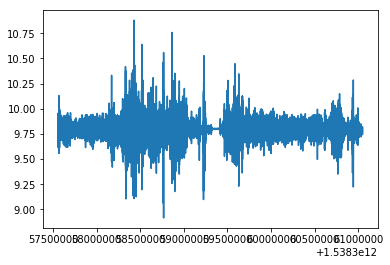

In [6]:
plt.plot(raw_data.time, raw_data.acceY)
plt.show()

# Anomaly Places

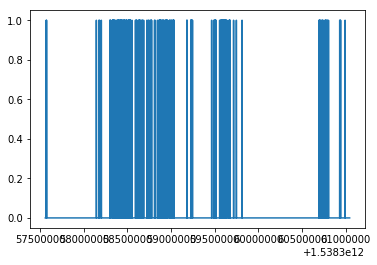

In [7]:
plt.plot(tag_data.time, tag_data.value)
plt.show()